In [1]:
import pandas  as pd
import numpy as np

In [2]:
train=pd.read_csv('C:/Users/19850/Desktop/数据库/NHANES数据库/写作/机器学习-临床预测模型/卒中后抑郁症风险/数据/筛选的变量用于python/train.csv')
test=pd.read_csv('C:/Users/19850/Desktop/数据库/NHANES数据库/写作/机器学习-临床预测模型/卒中后抑郁症风险/数据/筛选的变量用于python/test.csv')

In [3]:
X_train=train.iloc[:,:-1]
y_train=train.iloc[:,-1]
X_test=test.iloc[:,:-1]
y_test=test.iloc[:,-1]

In [5]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [6]:
# 创建Gradient Boosting分类器
gbm = GradientBoostingClassifier(random_state=42)

In [7]:
# 设置要搜索的参数范围
param_grid = {
    'n_estimators': [50, 100, 200],  # 基学习器的数量
    'learning_rate': [0.01, 0.1, 0.2],  # 学习率
    'max_depth': [3, 5, 7],            # 最大深度
    'min_samples_split': [2, 5, 10]    # 最小样本分裂数
}


In [8]:
# 创建网格搜索
grid_search = GridSearchCV(estimator=gbm, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=1)

In [9]:
# 拟合模型
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=1)

In [10]:
# 输出最佳参数
print("最佳参数：", grid_search.best_params_)

最佳参数： {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 100}


In [11]:
# 用最佳参数的模型在测试集上进行预测
best_gbm_clf = grid_search.best_estimator_

In [13]:
from sklearn.metrics import classification_report

# 预测测试集
y_pred =best_gbm_clf.predict(X_test)

# 输出模型报告， 查看评价指标
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       282
           1       0.00      0.00      0.00        55

    accuracy                           0.84       337
   macro avg       0.42      0.50      0.46       337
weighted avg       0.70      0.84      0.76       337



C:\Users\19850\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\19850\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\19850\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


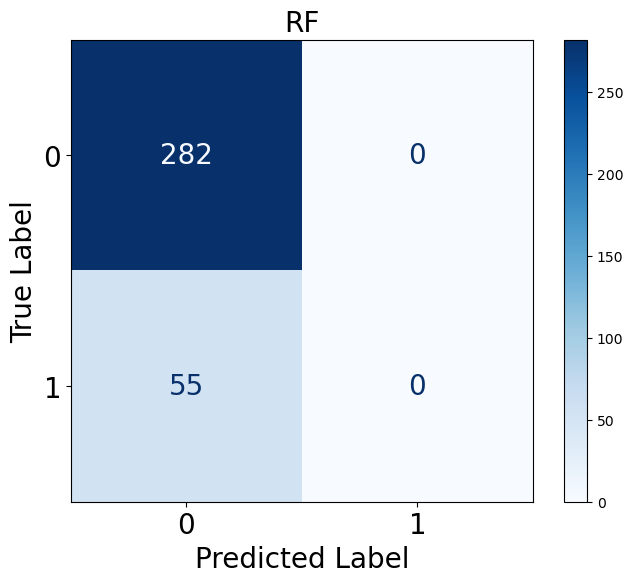

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns
# 计算混淆矩阵
confusion_matrix_model = confusion_matrix(y_test, y_pred)
# 使用 ConfusionMatrixDisplay 绘制混淆矩阵热力图
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_model)
fig, ax = plt.subplots(figsize=(8, 6))  # 可以调整图的大小
cm_display.plot(cmap='Blues', ax=ax, values_format='d')

# 修改数字字体大小
for texts in ax.texts:
    texts.set_fontsize(20)

# 设置图形标签和标题
plt.title('RF', fontsize=20)
plt.xlabel('Predicted Label', fontsize=20)
plt.ylabel('True Label', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

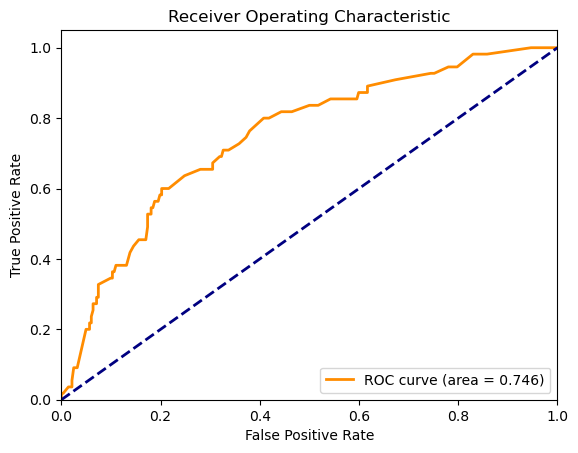

In [15]:
from sklearn.metrics import roc_curve, auc
# 预测概率
y_score = best_gbm_clf.predict_proba(X_test)[:, 1]
# 计算ROC曲线
fpr_logistic, tpr_logistic, _ = roc_curve(y_test, y_score)
roc_auc_logistic = auc(fpr_logistic, tpr_logistic)
# 绘制ROC曲线
plt.figure()
plt.plot(fpr_logistic, tpr_logistic, color='darkorange', lw=2, label='ROC curve (area = %0.3f)' % roc_auc_logistic)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()